In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Rankings by sales
sales_ranking = [
    "Nike", "LouisVuitton", "Chanel", "Gucci", "Adidas", "Hermes", "Dior", 
    "Cartier", "Zara", "Rolex", "HM", "UNIQLO", "TiffanyCo", "Coach"
]

# Rankings by hashtag posts
hashtag_ranking = [
    "nike", "adidas", "coach", "zara", "chanel", "gucci", "dior", "rolex", 
    "prada", "louisvuitton", "hermes", "puma", "burberry", "hm", "tiffany", 
    "givenchy"
]

# Convert to title case to match the sales_ranking formatting
hashtag_ranking = [brand.title() for brand in hashtag_ranking]

# Creating a DataFrame with common brands
common_brands = set(sales_ranking) & set(hashtag_ranking)
sales_ranking_filtered = [brand for brand in sales_ranking if brand in common_brands]
hashtag_ranking_filtered = [brand for brand in hashtag_ranking if brand in common_brands]

# Create ranking indices
sales_indices = [sales_ranking_filtered.index(brand) + 1 for brand in common_brands]
hashtag_indices = [hashtag_ranking_filtered.index(brand) + 1 for brand in common_brands]

# Create a DataFrame
df = pd.DataFrame({
    "Brand": list(common_brands),
    "SalesRanking": sales_indices,
    "HashtagRanking": hashtag_indices
})

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(df["SalesRanking"], df["HashtagRanking"])


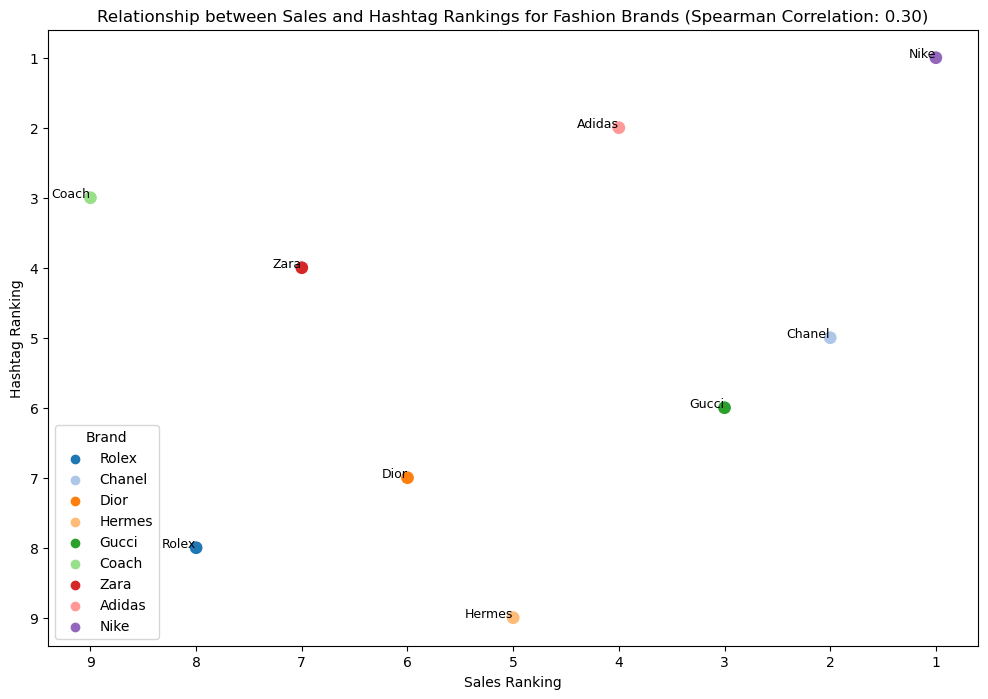

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="SalesRanking", y="HashtagRanking", hue="Brand", palette="tab20", s=100)

# Annotate each point with the brand name
for i in range(df.shape[0]):
    plt.text(df["SalesRanking"][i], df["HashtagRanking"][i], df["Brand"][i], fontsize=9, ha='right')

# Adding titles and labels
plt.title(f"Relationship between Sales and Hashtag Rankings for Fashion Brands (Spearman Correlation: {spearman_corr:.2f})")
plt.xlabel("Sales Ranking")
plt.ylabel("Hashtag Ranking")
plt.gca().invert_xaxis()  # Invert the x-axis so rank 1 is at the top
plt.gca().invert_yaxis()  # Invert the y-axis so rank 1 is at the top

# Display the plot
plt.show()

In [3]:
# Heatmap of Rankings
heatmap_data = df.pivot("SalesRanking", "HashtagRanking", "Brand")

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=False, linewidths=.5)

# Adding titles and labels
plt.title("Heatmap of Sales vs Hashtag Rankings for Fashion Brands")
plt.xlabel("Hashtag Ranking")
plt.ylabel("Sales Ranking")
plt.gca().invert_yaxis()  # Invert the y-axis so rank 1 is at the top

# Display the plot
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

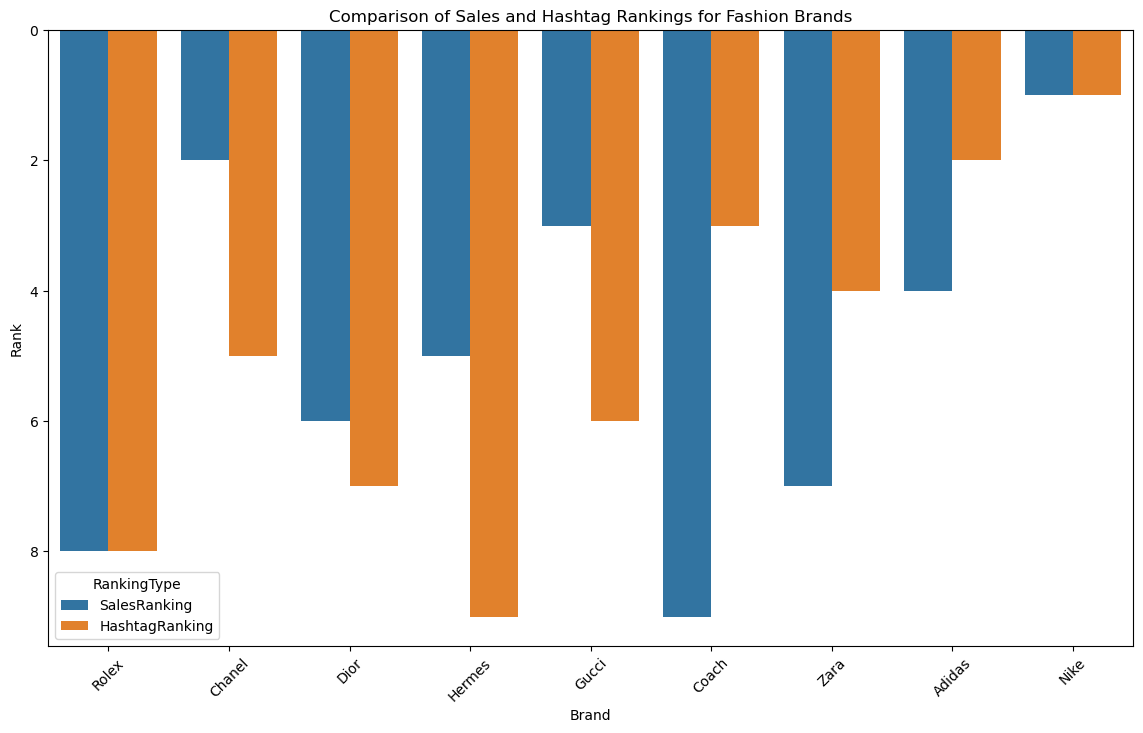

In [4]:
# Bar Plot
df_melted = df.melt(id_vars="Brand", value_vars=["SalesRanking", "HashtagRanking"], var_name="RankingType", value_name="Rank")

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x="Brand", y="Rank", hue="RankingType", dodge=True)

# Adding titles and labels
plt.title("Comparison of Sales and Hashtag Rankings for Fashion Brands")
plt.xlabel("Brand")
plt.ylabel("Rank")
plt.gca().invert_yaxis()  # Invert the y-axis so rank 1 is at the top
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [9]:
coach is 15th ranking in sales 

SyntaxError: invalid decimal literal (1571039878.py, line 1)

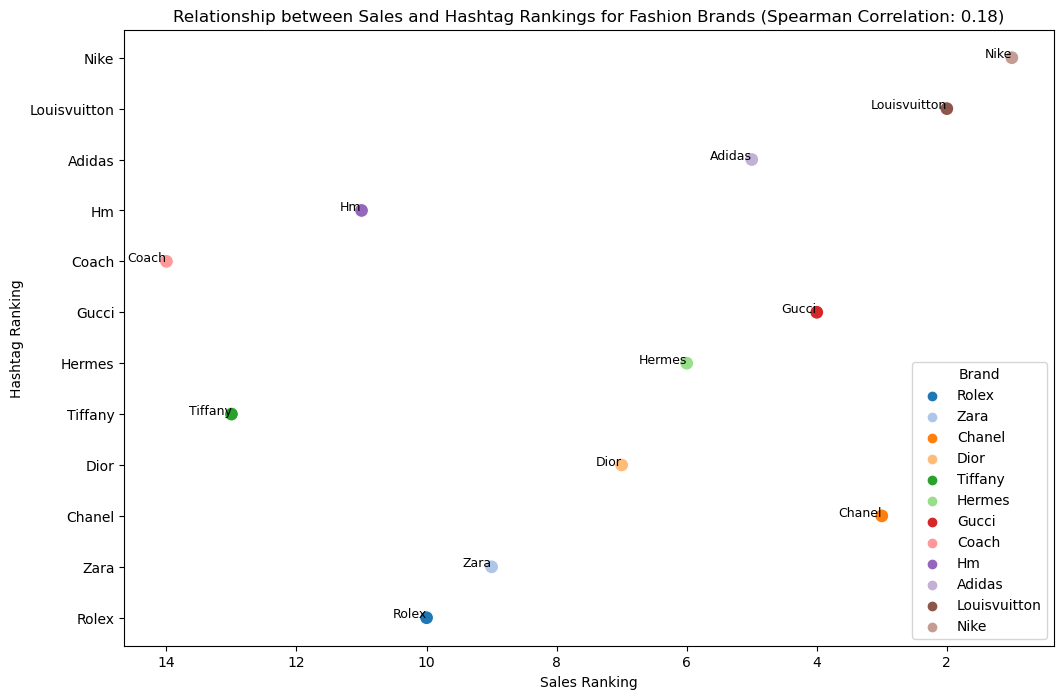

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import spearmanr

# Rankings by sales
sales_ranking = [
    "Nike", "LouisVuitton", "Chanel", "Gucci", "Adidas", "Hermes", "Dior", 
    "Cartier", "Zara", "Rolex", "HM", "UNIQLO", "TiffanyCo", "Coach"
]

# Rankings by hashtag posts
hashtag_ranking = [
    "nike", "adidas", "coach", "zara", "chanel", "gucci", "dior", "rolex", 
    "prada", "louisvuitton", "hermes", "puma", "burberry", "hm", "tiffany", 
    "givenchy"
]

# Normalize brand names (convert to title case and replace TiffanyCo with Tiffany)
sales_ranking = ["Tiffany" if brand.lower() in ["tiffanyco", "tiffany"] else brand.title() for brand in sales_ranking]
hashtag_ranking = ["Tiffany" if brand.lower() in ["tiffanyco", "tiffany"] else brand.title() for brand in hashtag_ranking]

# Create dictionaries for fast lookup of ranks
sales_rank_dict = {brand: rank for rank, brand in enumerate(sales_ranking, 1)}
hashtag_rank_dict = {brand: rank for rank in hashtag_ranking for brand in [rank]}

# Find common brands and their ranks
common_brands = list(set(sales_ranking) & set(hashtag_ranking))
sales_ranks = [sales_rank_dict[brand] for brand in common_brands]
hashtag_ranks = [hashtag_rank_dict[brand] for brand in common_brands]

# Create a DataFrame
df = pd.DataFrame({
    "Brand": common_brands,
    "SalesRanking": sales_ranks,
    "HashtagRanking": hashtag_ranks
})

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(df["SalesRanking"], df["HashtagRanking"])

# Plotting the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="SalesRanking", y="HashtagRanking", hue="Brand", palette="tab20", s=100)

# Annotate each point with the brand name
for i in range(df.shape[0]):
    plt.text(df["SalesRanking"][i], df["HashtagRanking"][i], df["Brand"][i], fontsize=9, ha='right')

# Adding titles and labels
plt.title(f"Relationship between Sales and Hashtag Rankings for Fashion Brands (Spearman Correlation: {spearman_corr:.2f})")
plt.xlabel("Sales Ranking")
plt.ylabel("Hashtag Ranking")
plt.gca().invert_xaxis()  # Invert the x-axis so rank 1 is at the top
plt.gca().invert_yaxis()  # Invert the y-axis so rank 1 is at the top

# Display the plot
plt.show()


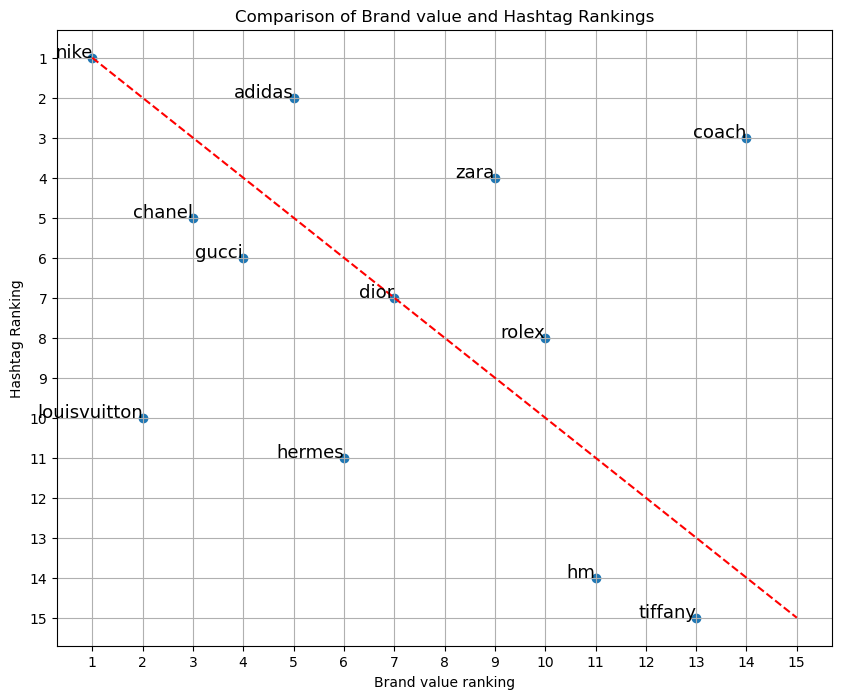

In [28]:
import matplotlib.pyplot as plt

# Define the sales and hash rankings
sales_ranking = ["Nike", "LouisVuitton", "Chanel", "Gucci", "Adidas", "Hermes", "Dior", "Cartier", "Zara", "Rolex", "HM", "UNIQLO", "Tiffany", "Coach", "Chow Tai Fook"]
hash_ranking = ["nike", "adidas", "coach", "zara", "chanel", "gucci", "dior", "rolex", "prada", "louisvuitton", "hermes", "puma", "burberry", "hm", "tiffany"]

# Normalize brand names for consistency
sales_ranking_normalized = [brand.replace(" ", "").lower() for brand in sales_ranking]
hash_ranking_normalized = [brand.replace(" ", "").lower() for brand in hash_ranking]

# Create dictionaries for rankings
sales_ranking_dict = {brand: rank+1 for rank, brand in enumerate(sales_ranking_normalized)}
hash_ranking_dict = {brand: rank+1 for rank, brand in enumerate(hash_ranking_normalized)}

# Find common brands
common_brands = set(sales_ranking_dict.keys()) & set(hash_ranking_dict.keys())

# Extract rankings for common brands
sales_ranks = [sales_ranking_dict[brand] for brand in common_brands]
hash_ranks = [hash_ranking_dict[brand] for brand in common_brands]

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(sales_ranks, hash_ranks)

# Add annotations for each point
for brand in common_brands:
    plt.text(sales_ranking_dict[brand], hash_ranking_dict[brand], brand, fontsize=13, ha='right', )

# Add a diagonal line to indicate perfect correlation
plt.plot([1, 15], [1, 15], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('Brand value ranking')
plt.ylabel('Hashtag Ranking')
plt.title('Comparison of Brand value and Hashtag Rankings')
plt.grid(True)
plt.xticks(range(1, 16))
plt.yticks(range(1, 16))
plt.gca().invert_yaxis()  # Invert y-axis to match ranking order
plt.savefig('data/correlation.jpeg', format='jpeg', dpi=300)

plt.show()
